In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from module.components.discrete_gaussian1D import DiscreteGaussian1D

## Distribution Test Site
It is tried to find a discrete distribution given its mean and variance Due to theoretical reasoning, and maximizing entropy under constrains, the functional form of the distribution $p(m)$ for $m \in \mathbb{Z}$ is:

$$
p_m = \frac{1}{Z}e^{-\alpha(m - \mu)^2} \quad\text{for}\quad m \in \mathbb{Z}
$$

It's variance-threshold is $p_c (1-p_c)$, where $p_c$ are the decimal places of the mean. Lower variances are not possible and it is thus resorted to Lawrence' distribution.

In [7]:
g = DiscreteGaussian1D()
phase_space = g.phase_space

In [10]:
vars = np.linspace(0,1)
t_mean = 5.2345678
decimals = t_mean - np.floor(t_mean)

means = []
a_vars = []

In [11]:
for var in vars:
    probs = g.calc_prob(t_mean , var)
    mean = np.sum(phase_space * probs)
    var = np.sum(phase_space ** 2 * probs) - mean **2

    means.append(mean)
    a_vars.append(var)

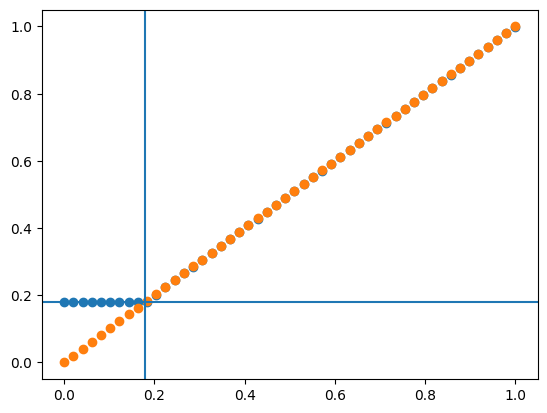

In [13]:
plt.scatter(vars, a_vars)
plt.scatter(vars, vars)
plt.axhline(decimals * (1 - decimals))
plt.axvline(decimals * (1 - decimals))

In [14]:
probs = g.calc_prob(mean , var)
mean = np.sum(phase_space * probs)
var = np.sum(phase_space ** 2 * probs) - mean **2
print("mean:", mean)
print("var:", var)

mean: 5.234567800623328
var: 0.9990238793949224


---

In [28]:
phase_space = np.arange(-20, 20)

mean = 5.3
var = 0.15

In [29]:
def calc_prob(mean, var):
    prob = np.exp(-0.5 * (phase_space - mean)**2 / var)
    Z = np.sum(prob)
    return prob / Z

<BarContainer object of 40 artists>

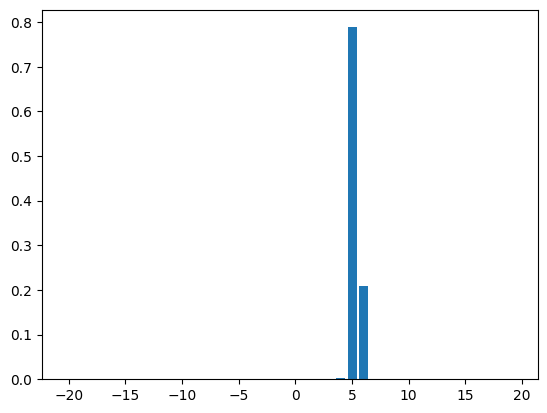

In [30]:
plt.bar(phase_space, calc_prob(mean, var))